In [1]:
import sys
sys.path.append('../')

In [2]:
import libs.db
import libs.prep_df
import pandas as pd
import sqlite3



In [3]:
sql_file = "sp10_not_normalized.db"
conn = libs.db.create_connection(sql_file)
df = libs.db.df_from_db(conn)
libs.db.close_connection(conn)
df.head()

,id,symbol,timestamp,close
0,1,AAPL,2017-01-03T09:00:00+00:00,116.05
1,2,AAPL,2017-01-03T10:00:00+00:00,116.02
2,3,AAPL,2017-01-03T11:00:00+00:00,116.28
3,4,AAPL,2017-01-03T12:00:00+00:00,116.02
4,5,AAPL,2017-01-03T13:00:00+00:00,116.20


In [36]:
norm_df = libs.prep_df.normalize_df(df)
aapl_df = pd.DataFrame(norm_df["AAPL"])
aapl_df.head()

,AAPL
timestamp,
2017-01-03 09:00:00+00:00,116.05
2017-01-03 10:00:00+00:00,116.02
2017-01-03 11:00:00+00:00,116.28
2017-01-03 12:00:00+00:00,116.02
2017-01-03 13:00:00+00:00,116.20


In [37]:
num_ticks = 60
for i in range(1,num_ticks):
    name = f"AAPL-{i}"
    aapl_df[name] = aapl_df["AAPL"].shift(i)
aapl_df.iloc[10:30,:]

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-50,AAPL-51,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 19:00:00+00:00,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 20:00:00+00:00,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 21:00:00+00:00,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 22:00:00+00:00,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 23:00:00+00:00,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00+00:00,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 09:00:00+00:00,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 10:00:00+00:00,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 11:00:00+00:00,116.0800,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
returns_df = pd.DataFrame()
returns_df["AAPL_24_Return"] = aapl_df["AAPL"].pct_change(periods=16)
returns_df["AAPL_buy"] = returns_df["AAPL_24_Return"].apply(lambda x: 1 if x > 0.01 else 0)
returns_df["AAPL_buy"].sum()

4536

In [39]:
aapl_df = aapl_df.pct_change()
aapl_df = pd.concat([aapl_df, returns_df], axis=1)
aapl_df.dropna(inplace=True)
aapl_df.head()

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59,AAPL_24_Return,AAPL_buy
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-06 21:00:00+00:00,0.000509,-0.000543,0.001138,-0.000630,-0.000226,0.002644,-0.000595,0.009781,-0.001285,0.001115,...,0.000774,-0.000644,-0.001902,-0.004561,0.001551,-0.002236,0.002241,-0.000259,0.011143,1
2017-01-06 22:00:00+00:00,-0.000170,0.000509,-0.000543,0.001138,-0.000630,-0.000226,0.002644,-0.000595,0.009781,-0.001285,...,-0.001992,0.000774,-0.000644,-0.001902,-0.004561,0.001551,-0.002236,0.002241,0.010712,1
2017-01-06 23:00:00+00:00,-0.000509,-0.000170,0.000509,-0.000543,0.001138,-0.000630,-0.000226,0.002644,-0.000595,0.009781,...,0.001692,-0.001992,0.000774,-0.000644,-0.001902,-0.004561,0.001551,-0.002236,0.010371,1
2017-01-07 00:00:00+00:00,-0.000339,-0.000509,-0.000170,0.000509,-0.000543,0.001138,-0.000630,-0.000226,0.002644,-0.000595,...,0.006151,0.001692,-0.001992,0.000774,-0.000644,-0.001902,-0.004561,0.001551,0.009769,0
2017-01-09 09:00:00+00:00,-0.001018,-0.000339,-0.000509,-0.000170,0.000509,-0.000543,0.001138,-0.000630,-0.000226,0.002644,...,0.000086,0.006151,0.001692,-0.001992,0.000774,-0.000644,-0.001902,-0.004561,0.008740,0


In [40]:
from sklearn.linear_model import LinearRegression

In [47]:
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_24_Return"].values

In [54]:
aapl_model = LinearRegression()
aapl_model.fit(X,y)
y

array([ 0.01114349,  0.01071214,  0.01037113, ..., -0.00209455,
       -0.00216968, -0.00231949])

<AxesSubplot:>

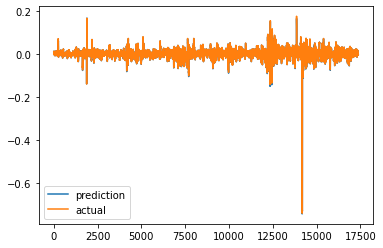

In [60]:
predicted_y_values = aapl_model.predict(X)
pd.DataFrame({"prediction": predicted_y_values, "actual": y}).plot()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = aapl_model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9992219614445379.
The r2 is 0.9992219614445379.
The mean squared error is 6.786025459036328e-07.
The root mean squared error is 0.0008237733583356728.
The standard deviation is 0.029532973989271908.
